# Derivación numérica aplicando diferencias centradas a $ f(x) $

1. Se importan las librerías a utilizar

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sympy import *
from matplotlib.pyplot import figure
import tikzplotlib

In [2]:
n = 51
dx = (5-0)/(n-1)
t = np.linspace(0, 5, n)

2. Se intruduce la ecuación $f(x) = 3t^6 + 5t^5 + 3t^4 - 5t^3 + 12t^2 - 6t - 1$ y sus respectivas primeras cuatro derivadas

In [3]:
x = 3*t**6 + 5*t**5 + 3*t**4 - 5*t**3 + 12*t**2 - 6*t - 1
derx = 18*t**5 + 25*t**4 + 12*t**3 - 15*t**2 + 24*t - 6
der2x = 90*t**4 + 100*t**3 + 36*t**2 - 30*t + 24
der3x = 360*t**3 + 300*t**2 + 72*t - 30
der4x = 1080*t**2 + 600*t + 72

3. Se crean las matrices para cada caso y se realiza el producto punto entre la matriz y el vector posición

In [4]:
D = np.zeros([n,n])
D2 = np.zeros([n,n])
D3 = np.zeros([n,n])
D4 = np.zeros([n,n])

for j in range(n-1):
    D[j, j+1] = 1
    D[j+1, j] = -1
    
    D2[j, j+1] = 1
    D2[j+1, j] = 1
    D2[j, j] = -2
    
    D3[j, j+1] = -2
    if j < n-2:
        D3[j, j+2] = 1
        D3[j+2, j] = -1
    D3[j+1, j] = 2

    D4[j, j+1] = -4
    if j < n-2:
        D4[j, j+2] = 1
        D4[j+2, j] = 1
    D4[j+1, j] = -4
    D4[j, j] = 6
    
    

derx_a = D.dot(x.reshape(-1, 1))/(2*dx)
derx_a = np.delete(derx_a, [0, n-1])
derx2_a = D2.dot(x.reshape(-1, 1))/(dx**2)
derx2_a = np.delete(derx2_a, [0, n-1])
derx3_a = D3.dot(x.reshape(-1, 1))/(2*dx**3)
derx3_a = np.delete(derx3_a, [0, 1, n-1, n-2])
derx4_a = D4.dot(x.reshape(-1, 1)/dx**4)
derx4_a = np.delete(derx4_a, [0, 1, n-1, n-2])

4. Se crea la gráfica que muestra la función y sus derivadas

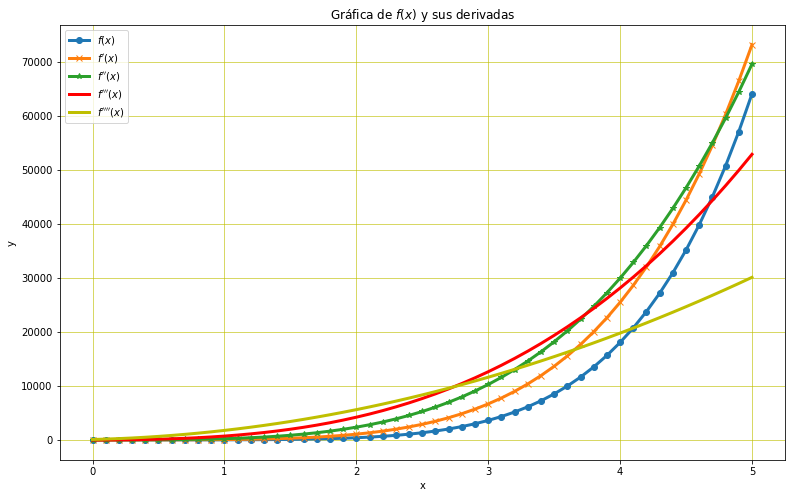

In [5]:
figure(figsize=(13,8))


plt.plot(t, x, "o-", lw=3, label = '$f(x)$')
plt.plot(t, derx, "x-", lw=3, label = '$f^{\prime}(x)$')
plt.plot(t, der2x, "*-", lw=3, label = '$f^{\prime \prime}(x)$')
plt.plot(t, der3x, lw=3, color = 'r', label = '$f^{\prime \prime \prime}(x)$')
plt.plot(t, der4x, lw=3, color = 'y', label = '$f^{\prime \prime \prime \prime}(x)$')
plt.legend(loc=2)
plt.title('Gráfica de $f(x)$ y sus derivadas')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(color='y', linestyle='-', linewidth=0.6)
tikzplotlib.save("Figure1.tex")

5. Se crea la gráfica la cual es el resultado de la derivación numérica

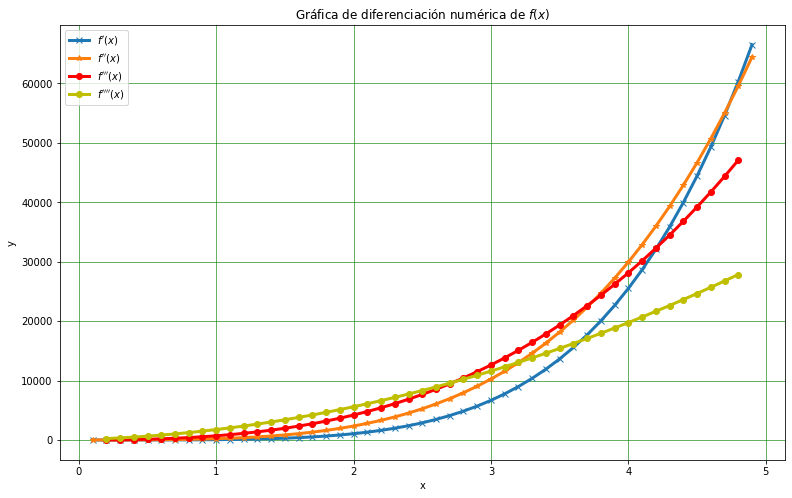

In [6]:
figure(figsize=(13,8))

plt.plot(np.delete(t, [0, (n-1)]), derx_a, "x-", lw=3, label = '$f^{\prime}(x)$')
plt.plot(np.delete(t, [0, n-1]), derx2_a, "*-", lw=3, label = '$f^{\prime \prime}(x)$')
plt.plot(np.delete(t, [0, 1, n-2, n-1]), derx3_a, "o-", lw=3, color = 'r', label = '$f^{\prime \prime \prime}(x)$')
plt.plot(np.delete(t, [0, 1, n-2, n-1]), derx4_a, "o-", lw=3, color = 'y', label = '$f^{\prime \prime \prime \prime}(x)$')
plt.legend(loc=2)
plt.title('Gráfica de diferenciación numérica de $f(x)$')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(color='g', linestyle='-', linewidth=0.6)
tikzplotlib.save("Figure2.tex")

6. Se muestra una comparación entre la dereivación analítica y la numérica para cada derivada

Primera derivada

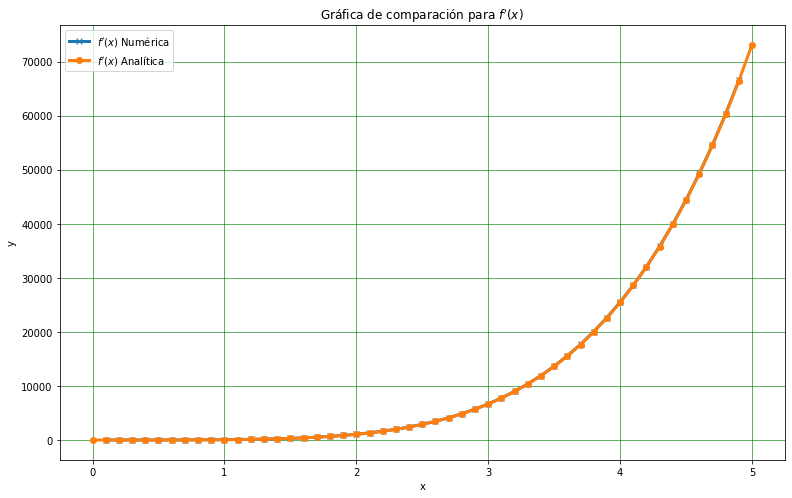

In [7]:
figure(figsize=(13,8))

plt.plot(np.delete(t, [0, (n-1)]), derx_a, "x-", lw=3, label = '$f^{\prime}(x)$ Numérica')
plt.plot(t, derx, "o-", lw=3, label = '$f^{\prime}(x)$ Analítica')
plt.legend(loc=2)
plt.title('Gráfica de comparación para $f^{\prime}(x)$')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(color='g', linestyle='-', linewidth=0.6)

Segunda derivada

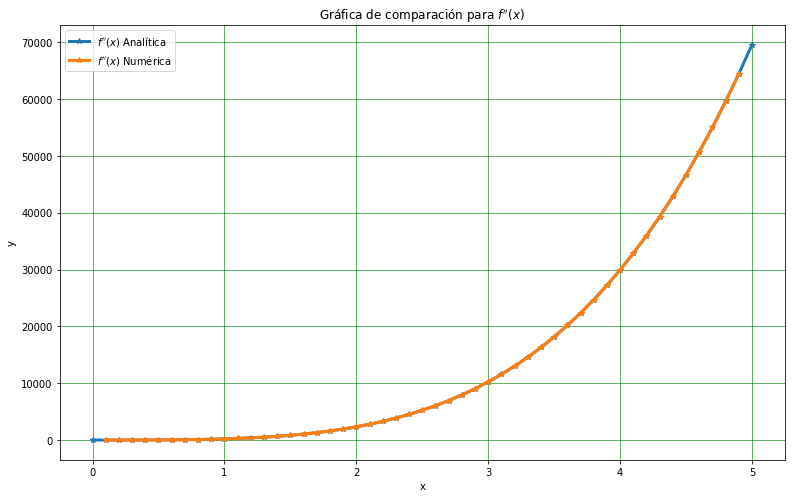

In [8]:
figure(figsize=(13,8))

plt.plot(t, der2x, "*-", lw=3, label = '$f^{\prime \prime}(x)$ Analítica')
plt.plot(np.delete(t, [0, n-1]), derx2_a, "*-", lw=3, label = '$f^{\prime \prime}(x)$ Numérica')
plt.legend(loc=2)
plt.title('Gráfica de comparación para $f^{\prime \prime}(x)$')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(color='g', linestyle='-', linewidth=0.6)

Tercera derivada

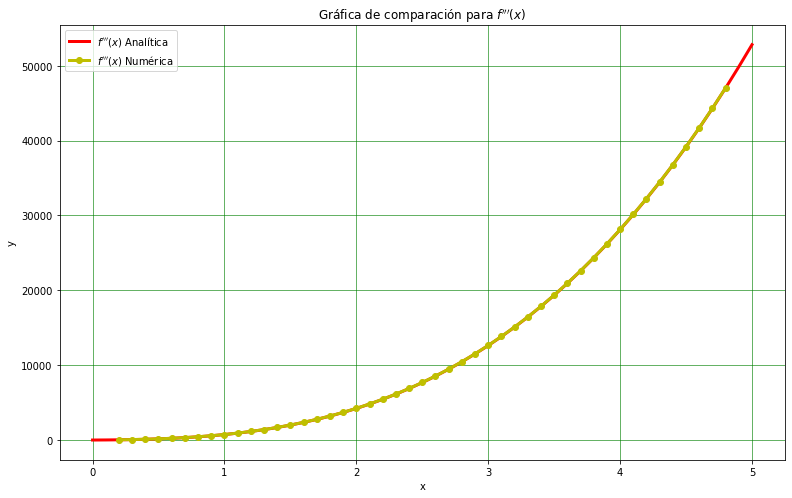

In [9]:
figure(figsize=(13,8))

plt.plot(t, der3x, lw=3, color = 'r', label = '$f^{\prime \prime \prime}(x)$ Analítica')
plt.plot(np.delete(t, [0, 1, n-2, n-1]), derx3_a, "o-", lw=3, color = 'y', label = '$f^{\prime \prime \prime}(x)$ Numérica')
plt.legend(loc=2)
plt.title('Gráfica de comparación para $f^{\prime \prime \prime}(x)$')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(color='g', linestyle='-', linewidth=0.6)

Cuarta Derivada

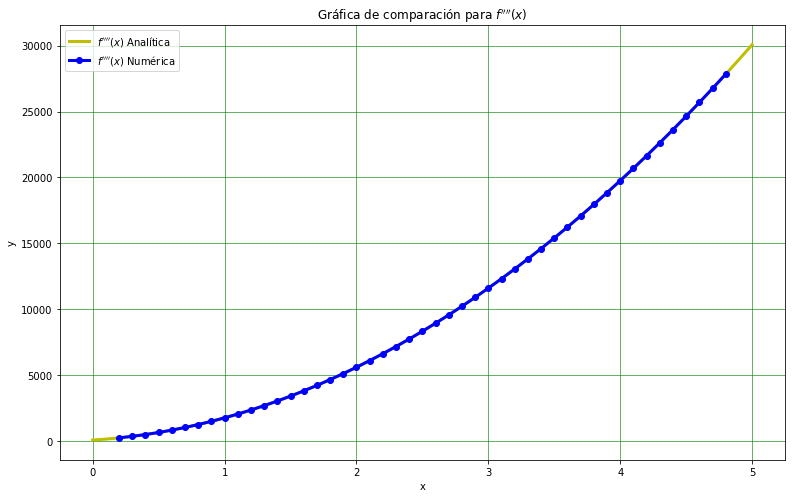

In [10]:
figure(figsize=(13,8))

plt.plot(t, der4x, lw=3, color = 'y', label = '$f^{\prime \prime \prime \prime}(x)$ Analítica')
plt.plot(np.delete(t, [0, 1, n-2, n-1]), derx4_a, "o-", lw=3, color = 'b', label = '$f^{\prime \prime \prime \prime}(x)$ Numérica')
plt.legend(loc=2)
plt.title('Gráfica de comparación para $f^{\prime \prime \prime \prime}(x)$')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(color='g', linestyle='-', linewidth=0.6)

7. Ahora se procede a calcular el error de la derivación numérica para cada una de las derivadas

In [27]:
error_x = abs(abs((np.delete(derx, [0, (n-1)])) - derx_a)/(np.delete(derx, [0, (n-1)])))*100
error_2x = abs(abs((np.delete(der2x, [0, (n-1)])) - derx2_a)/(np.delete(der2x, [0, (n-1)])))*100
error_3x = abs(abs((np.delete(der3x, [0, 1, n-2, n-1])) - derx3_a)/(np.delete(der3x, [0, 1, n-2, n-1])))*100
error_4x = abs(abs((np.delete(der4x, [0, 1, n-2, n-1])) - derx4_a)/(np.delete(der4x, [0, 1, n-2, n-1])))*100

Error de la primera derivada

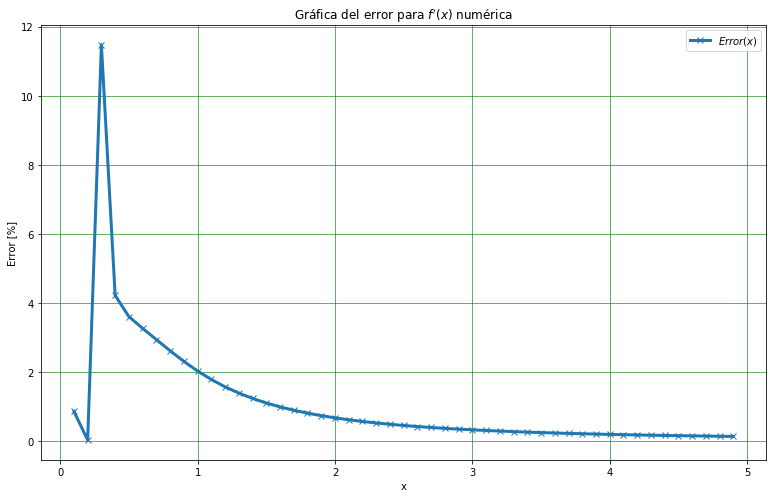

In [33]:
figure(figsize=(13,8))

plt.plot(np.delete(t, [0, (n-1)]), error_x, "x-", lw=3, label = '$Error(x)$')
plt.legend(loc=1)
plt.title('Gráfica del error para $f^{\prime}(x)$ numérica')
plt.xlabel('x')
plt.ylabel('Error [%]')
plt.grid(color='g', linestyle='-', linewidth=0.6)

Error de la segunda derivada

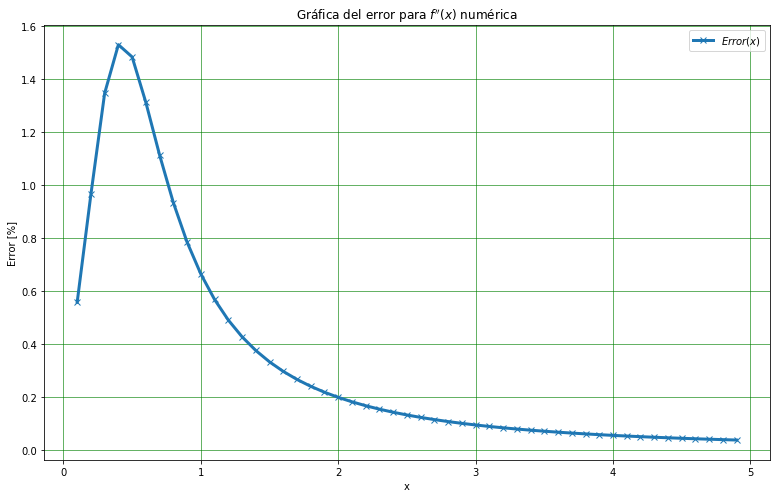

In [34]:
figure(figsize=(13,8))

plt.plot(np.delete(t, [0, (n-1)]), error_2x, "x-", lw=3, label = '$Error(x)$')
plt.legend(loc=1)
plt.title('Gráfica del error para $f^{\prime \prime}(x)$ numérica')
plt.xlabel('x')
plt.ylabel('Error [%]')
plt.grid(color='g', linestyle='-', linewidth=0.6)

In [ ]:
Error de la tercera derivada

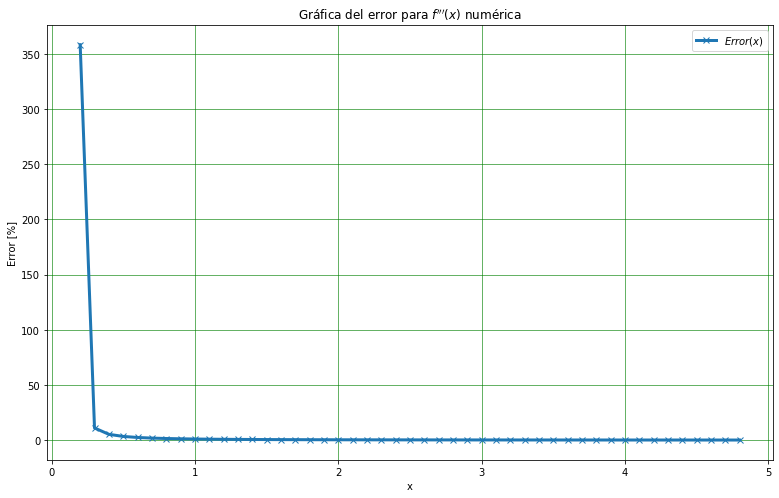

In [36]:
figure(figsize=(13,8))

plt.plot(np.delete(t, [0, 1, n-2, n-1]), error_3x, "x-", lw=3, label = '$Error(x)$')
plt.legend(loc=1)
plt.title('Gráfica del error para $f^{\prime \prime \prime}(x)$ numérica')
plt.xlabel('x')
plt.ylabel('Error [%]')
plt.grid(color='g', linestyle='-', linewidth=0.6)

In [ ]:
Error de la cuarta derivada

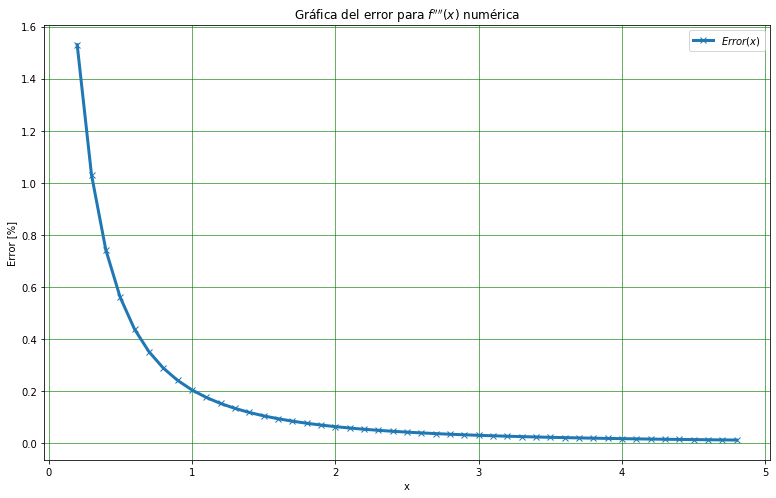

In [37]:
figure(figsize=(13,8))

plt.plot(np.delete(t, [0, 1, n-2, n-1]), error_4x, "x-", lw=3, label = '$Error(x)$')
plt.legend(loc=1)
plt.title('Gráfica del error para $f^{\prime \prime \prime \prime}(x)$ numérica')
plt.xlabel('x')
plt.ylabel('Error [%]')
plt.grid(color='g', linestyle='-', linewidth=0.6)